In [1]:
import os
import sys
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd

['ContrastiveLoss_output_cls', 'ContrastiveLoss_output_max']
['cls', 'max']


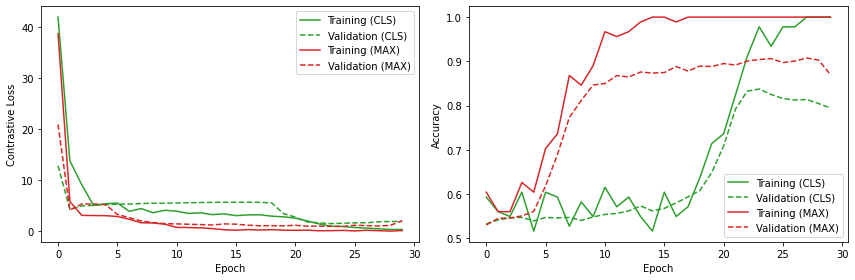

['TripletLoss_output_cls', 'TripletLoss_output_max']
['cls', 'max']


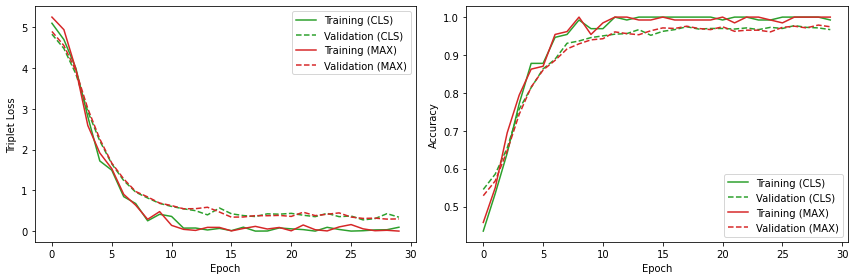

['SoftmaxLoss_output_cls', 'SoftmaxLoss_output_max']
['cls', 'max']


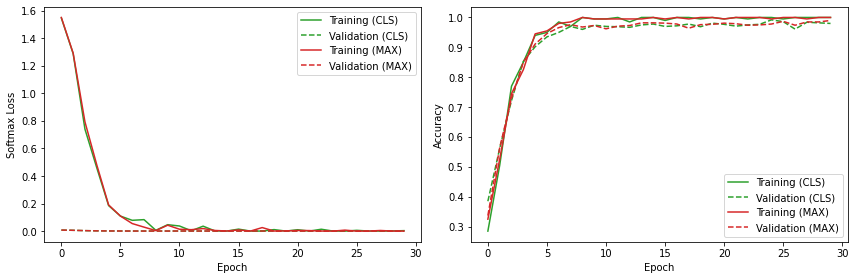

In [2]:
LOSS_NAMES = ["ContrastiveLoss", "TripletLoss", "SoftmaxLoss"]

for LOSS_NAME in LOSS_NAMES:
    # get folders starting with LOSS_NAME
    folders = glob.glob(LOSS_NAME + "_output_*")
    print(folders)

    pooling_methods = [folder.split("_")[-1] for folder in folders]
    print(pooling_methods)

    # plot loss and accuracy for each pooling method
    train_losses = {}
    train_accuracies = {}
    val_losses = {}
    val_accuracies = {}

    train_results = pd.read_csv(os.path.join(folders[0], "eval", "training_results.csv"))
    #print(train_results.head())

    val_results = pd.read_csv(os.path.join(folders[0], "eval", "validation_results.csv"))
    #print(val_results.head())

    for folder, pooling_method in zip(folders, pooling_methods):
        train_results = pd.read_csv(os.path.join(folder, "eval", "training_results.csv"))
        train_losses[pooling_method] = train_results["loss"].to_numpy()
        train_accuracies[pooling_method] = train_results["accuracy"].to_numpy()

        val_results = pd.read_csv(os.path.join(folder, "eval", "validation_results.csv"))
        val_losses[pooling_method] = val_results["loss"].to_numpy()
        val_accuracies[pooling_method] = val_results["accuracy"].to_numpy()



    fig = plt.subplots(1, 2, figsize=(12, 4))

    plt.subplot(1, 2, 1)
    for i, pooling_method in enumerate(pooling_methods):
        plt.plot(train_losses[pooling_method], label= f"Training ({pooling_method.upper()})", color=f"C"+str(i+2))
        plt.plot(val_losses[pooling_method], "--", label= f"Validation ({pooling_method.upper()})", color=f"C"+str(i+2))
    plt.xlabel("Epoch") 
    loss_short_name = LOSS_NAME.split("Loss")[0]
    plt.ylabel(f"{loss_short_name} Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    for i, pooling_method in enumerate(pooling_methods):
        plt.plot(train_accuracies[pooling_method], label= f"Training ({pooling_method.upper()})", color=f"C"+str(i+2))
        plt.plot(val_accuracies[pooling_method], "--", label= f"Validation ({pooling_method.upper()})", color=f"C"+str(i+2))
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()


    # save as pdf
    plt.tight_layout()
    plt.savefig(f"{LOSS_NAME}_loss_and_accuracy.pdf")
    plt.show()

